# Problem 1 - SSD, ONNX model, Visualization, Inferencing 35 points
In this problem we will be inferencing SSD ONNX model using ONNX Runtime Server. You will follow the github repo and ONNX tutorials (links provided below). You will start with a pretrained Pytorch SSD model
and retrain it for your target categories. Then you will convert this Pytorch model to ONNX and deploy it
on ONNX runtime server for inferencing.
## 1. Download pretrained pytorch MobilenetV1 SSD and test it locally using Pascal VOC 2007 dataset.
Show the test accuracy for the 20 classes. (4)

In [3]:
! git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 816, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 816 (delta 0), reused 1 (delta 0), pack-reused 814
Receiving objects: 100% (816/816), 1.05 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (546/546), done.


In [1]:
! wget -P ~/models/ https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth

--2022-12-04 22:28:30--  https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4004:c1d::80, 2607:f8b0:4004:c06::80, 2607:f8b0:4004:811::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4004:c1d::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37995286 (36M) [application/octet-stream]
Saving to: '/Users/katelassiter/models/mobilenet-v1-ssd-mp-0_675.pth'

mobilenet-v1-ssd-mp 100%[===================>]  36.23M  34.6MB/s    in 1.0s    

2022-12-04 22:28:32 (34.6 MB/s) - '/Users/katelassiter/models/mobilenet-v1-ssd-mp-0_675.pth' saved [37995286/37995286]



In [2]:
! wget -P ~/models/ https://storage.googleapis.com/models-hao/voc-model-labels.txt

--2022-12-04 22:28:45--  https://storage.googleapis.com/models-hao/voc-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4004:c06::80, 2607:f8b0:4004:811::2010, 2607:f8b0:4004:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4004:c06::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [text/plain]
Saving to: '/Users/katelassiter/models/voc-model-labels.txt'

voc-model-labels.tx 100%[===================>]     145  --.-KB/s    in 0s      

2022-12-04 22:28:45 (34.6 MB/s) - '/Users/katelassiter/models/voc-model-labels.txt' saved [145/145]



In [15]:
! wget -P data http://data.brainchip.com/dataset-mirror/voc/VOCtest_06-Nov-2007.tar

--2022-12-04 23:06:20--  http://data.brainchip.com/dataset-mirror/voc/VOCtest_06-Nov-2007.tar
Resolving data.brainchip.com (data.brainchip.com)... 2001:41d0:301::31, 146.59.209.152
Connecting to data.brainchip.com (data.brainchip.com)|2001:41d0:301::31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: 'data/VOCtest_06-Nov-2007.tar.1'

VOCtest_06-Nov-2007 100%[===================>] 430.13M  27.8MB/s    in 14s     

2022-12-04 23:06:35 (29.7 MB/s) - 'data/VOCtest_06-Nov-2007.tar.1' saved [451020800/451020800]



In [14]:
! python pytorch-ssd/eval_ssd.py --net mb1-ssd  --dataset ~/data/VOCdevkit/VOC2007/ --trained_model ~/models/mobilenet-v1-ssd-mp-0_675.pth --label_file ~/models/voc-model-labels.txt

/Users/katelassiter/Downloads/DeepLearning/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.024780988693237305 seconds to load the model.
process image 0
Load Image: 0.004437 seconds.
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Inference time:  0.15119624137878418
Prediction: 0.172625 seconds.
process image 1
Load Image: 0.003373 seconds.
Inference time:  0.058296918869018555
Prediction: 0.082866 seconds.
process image 2
Load Image: 0.003756 seconds.
Inference time:  0.04834389686584473
Prediction: 0.076552 seconds.
process image 3
Load Image: 0.003638 seconds.
Inference time:  0.05912590026855469
Prediction: 0.077360 seconds.
process image 4
Load Image: 0.002296 seconds.
Inference t

## 2. Select any two related categories from Google Open Images dataset and finetune the pretrained SSD model. Examples include, Aircraft and Aeroplane, Handgun and Shotgun. You can use open_images_downloader.py script provided at the github to download the data. For finetuning you can use the same parameters as in the tutorial below. Compute the accuracy of the test data for these categories before and after finetuning. (5+5)

In [16]:
!wget -P models https://storage.googleapis.com/models-hao/gun_model_2.21.pth

--2022-12-04 23:19:10--  https://storage.googleapis.com/models-hao/gun_model_2.21.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4004:c19::80, 2607:f8b0:4004:c1b::80, 2607:f8b0:4004:c17::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4004:c19::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27044080 (26M) [application/octet-stream]
Saving to: 'models/gun_model_2.21.pth'

gun_model_2.21.pth  100%[===================>]  25.79M  31.8MB/s    in 0.8s    

2022-12-04 23:19:11 (31.8 MB/s) - 'models/gun_model_2.21.pth' saved [27044080/27044080]



In [17]:
!wget -P models https://storage.googleapis.com/models-hao/open-images-model-labels.txt

--2022-12-04 23:19:14--  https://storage.googleapis.com/models-hao/open-images-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4004:c1b::80, 2607:f8b0:4004:c17::80, 2607:f8b0:4004:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4004:c1b::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26 [text/plain]
Saving to: 'models/open-images-model-labels.txt'

open-images-model-l 100%[===================>]      26  --.-KB/s    in 0s      

2022-12-04 23:19:14 (8.27 MB/s) - 'models/open-images-model-labels.txt' saved [26/26]



In [23]:
!python pytorch-ssd/open_images_downloader.py --root ~/data/open_images --class_names "Cat,Dog" --num_workers 20

2022-12-04 23:37:03,978 - root - Read annotation file /Users/katelassiter/data/open_images/train-annotations-bbox.csv
2022-12-04 23:37:19,001 - root - train bounding boxes size: 43858
2022-12-04 23:37:19,002 - root - Approximate Image Stats: 
2022-12-04 23:37:19,015 - root - Dog: 20607/33123 = 0.62.
2022-12-04 23:37:19,015 - root - Cat: 12516/33123 = 0.38.
2022-12-04 23:37:19,016 - root - Label distribution: 
2022-12-04 23:37:19,017 - root - Dog: 28675/43858 = 0.65.
2022-12-04 23:37:19,017 - root - Cat: 15183/43858 = 0.35.
2022-12-04 23:37:19,017 - root - Shuffle dataset.
2022-12-04 23:37:19,017 - root - Save train data to /Users/katelassiter/data/open_images/sub-train-annotations-bbox.csv.
2022-12-04 23:37:19,247 - root - Read annotation file /Users/katelassiter/data/open_images/validation-annotations-bbox.csv
2022-12-04 23:37:19,407 - root - validation bounding boxes size: 2311
2022-12-04 23:37:19,407 - root - Approximate Image Stats: 
2022-12-04 23:37:19,408 - root - Dog: 1581/1918 

In [36]:
!python pytorch-ssd/train_ssd.py --dataset_type open_images \
--datasets ~/data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth \
--scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 1 --num_epochs 10 \
--base_net_lr 0.001  --batch_size 5 --num_workers 0

2022-12-06 15:31:03,690 - root - INFO - Namespace(dataset_type='open_images', datasets=['/Users/katelassiter/data/open_images'], validation_dataset=None, balance_data=False, net='mb1-ssd', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.01, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=0.001, extra_layers_lr=None, base_net=None, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', milestones='80,100', t_max=100.0, batch_size=5, num_epochs=10, num_workers=0, validation_epochs=1, debug_steps=100, use_cuda=True, checkpoint_folder='models/')
2022-12-06 15:31:03,703 - root - INFO - Prepare training datasets.
2022-12-06 15:31:10,305 - root - INFO - Dataset Summary:Number of Images: 32892
Minimum Number of Images for a Class: -1
Label Distribution:
	Cat: 15183
	Dog: 28675
2022-12-06 15:31:10,322 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2022-12-06 15:31:10,322 - root - INFO - Train dataset size

### evaluation without fine tuning

In [67]:
!python pytorch-ssd/eval_ssd.py --dataset_type open_images \
--dataset ~/data/open_images --net mb1-ssd --trained_model models/mb1-ssd-Epoch-0-Loss-1.9312915196947895.pth \
--label_file models/open-images-model-labels.txt


/Users/katelassiter/Downloads/DeepLearning/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.039544105529785156 seconds to load the model.
process image 0
Load Image: 0.007902 seconds.
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Inference time:  0.19849395751953125
Prediction: 0.231023 seconds.
process image 1
Load Image: 0.006114 seconds.
Inference time:  0.058442115783691406
Prediction: 0.066207 seconds.
process image 2
Load Image: 0.005514 seconds.
Inference time:  0.08932209014892578
Prediction: 0.098677 seconds.
process image 3
Load Image: 0.014712 seconds.
Inference time:  0.04644179344177246
Prediction: 0.054257 seconds.
process image 4
Load Image: 0.015280 seconds.
Inference t

### evaluation with fine tuning

In [49]:
!python pytorch-ssd/eval_ssd.py --dataset_type open_images \
--dataset ~/data/open_images --net mb1-ssd --trained_model models/mb1-ssd-Epoch-9-Loss-1.7596479857884129.pth \
--label_file models/open-images-model-labels.txt


/Users/katelassiter/Downloads/DeepLearning/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.0408930778503418 seconds to load the model.
process image 0
Load Image: 0.009200 seconds.
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Inference time:  0.1777811050415039
Prediction: 0.212751 seconds.
process image 1
Load Image: 0.006837 seconds.
Inference time:  0.045272111892700195
Prediction: 0.052329 seconds.
process image 2
Load Image: 0.005740 seconds.
Inference time:  0.04842090606689453
Prediction: 0.055886 seconds.
process image 3
Load Image: 0.015063 seconds.
Inference time:  0.03767704963684082
Prediction: 0.042968 seconds.
process image 4
Load Image: 0.015691 seconds.
Inference time

## 3. Convert the Pytorch model to ONNX format and save it. (4)

In [73]:
!python pytorch-ssd/convert_to_caffe2_models_copy.py mb1-ssd models/mb1-ssd-Epoch-9-Loss-1.7596479857884129.pth models/open-images-model-labels.txt

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


In [ ]:
#messed around with the code trying to get it to work, versions not working

from vision.ssd.vgg_ssd import create_vgg_ssd
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
from vision.ssd.mobilenetv1_ssd_lite import create_mobilenetv1_ssd_lite
from vision.ssd.squeezenet_ssd_lite import create_squeezenet_ssd_lite
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite

import sys
import torch.onnx
#from caffe2.python.onnx.backend import Caffe2Backend as c2
import onnx

net_type = "mb1-ssd"
model_path = "models/mb1-ssd-Epoch-9-Loss-1.7596479857884129.pth"

label_path = "models/open-images-model-labels.txt"

class_names = [name.strip() for name in open(label_path).readlines()]
num_classes = len(class_names)

if net_type == 'mb1-ssd':
    net = create_mobilenetv1_ssd(len(class_names), is_test=True)

net.load(model_path)
net.eval()

model_path = f"models/{net_type}.onnx"
init_net_path = f"models/{net_type}_init_net.pb"
init_net_txt_path = f"models/{net_type}_init_net.pbtxt"
predict_net_path = f"models/{net_type}_predict_net.pb"
predict_net_txt_path = f"models/{net_type}_predict_net.pbtxt"

dummy_input = torch.randn(1, 3, 300, 300)
torch.onnx.export(net, dummy_input, model_path, verbose=False, output_names=['scores', 'boxes'])

model = onnx.load(model_path)
#init_net, predict_net = c2.onnx_graph_to_caffe2_net(model)

## 4. Visualize the model using net drawer tool. Compile the model using embed_docstring

In [80]:
# SPDX-License-Identifier: Apache-2.0
# A library and utility for drawing ONNX nets. Most of this implementation has
# been borrowed from the caffe2 implementation
# https://github.com/caffe2/caffe2/blob/master/caffe2/python/net_drawer.py
#
# The script takes two required arguments:
#   -input: a path to a serialized ModelProto .pb file.
#   -output: a path to write a dot file representation of the graph
#
# Given this dot file representation, you can-for example-export this to svg
# with the graphviz `dot` utility, like so:
#
#   $ dot -Tsvg my_output.dot -o my_output.svg

import argparse
import json
from collections import defaultdict
from typing import Any, Callable, Dict, Optional

import pydot

from onnx import GraphProto, ModelProto, NodeProto

OP_STYLE = {
    "shape": "box",
    "color": "#0F9D58",
    "style": "filled",
    "fontcolor": "#FFFFFF",
}

BLOB_STYLE = {"shape": "octagon"}

_NodeProducer = Callable[[NodeProto, int], pydot.Node]


def _escape_label(name: str) -> str:
    # json.dumps is poor man's escaping
    return json.dumps(name)


def _form_and_sanitize_docstring(s: str) -> str:
    url = "javascript:alert("
    url += _escape_label(s).replace('"', "'").replace("<", "").replace(">", "")
    url += ")"
    return url


def GetOpNodeProducer(embed_docstring: bool = False, **kwargs: Any) -> _NodeProducer:
    def ReallyGetOpNode(op: NodeProto, op_id: int) -> pydot.Node:
        if op.name:
            node_name = "%s/%s (op#%d)" % (op.name, op.op_type, op_id)
        else:
            node_name = "%s (op#%d)" % (op.op_type, op_id)
        for i, input in enumerate(op.input):
            node_name += "\n input" + str(i) + " " + input
        for i, output in enumerate(op.output):
            node_name += "\n output" + str(i) + " " + output
        node = pydot.Node(node_name, **kwargs)
        if embed_docstring:
            url = _form_and_sanitize_docstring(op.doc_string)
            node.set_URL(url)
        return node

    return ReallyGetOpNode


def GetPydotGraph(
    graph: GraphProto,
    name: Optional[str] = None,
    rankdir: str = "LR",
    node_producer: Optional[_NodeProducer] = None,
    embed_docstring: bool = False,
) -> pydot.Dot:
    if node_producer is None:
        node_producer = GetOpNodeProducer(embed_docstring=embed_docstring, **OP_STYLE)
    pydot_graph = pydot.Dot(name, rankdir=rankdir)
    pydot_nodes: Dict[str, pydot.Node] = {}
    pydot_node_counts: Dict[str, int] = defaultdict(int)
    for op_id, op in enumerate(graph.node):
        op_node = node_producer(op, op_id)
        pydot_graph.add_node(op_node)
        for input_name in op.input:
            if input_name not in pydot_nodes:
                input_node = pydot.Node(
                    _escape_label(input_name + str(pydot_node_counts[input_name])),
                    label=_escape_label(input_name),
                    **BLOB_STYLE,
                )
                pydot_nodes[input_name] = input_node
            else:
                input_node = pydot_nodes[input_name]
            pydot_graph.add_node(input_node)
            pydot_graph.add_edge(pydot.Edge(input_node, op_node))
        for output_name in op.output:
            if output_name in pydot_nodes:
                pydot_node_counts[output_name] += 1
            output_node = pydot.Node(
                _escape_label(output_name + str(pydot_node_counts[output_name])),
                label=_escape_label(output_name),
                **BLOB_STYLE,
            )
            pydot_nodes[output_name] = output_node
            pydot_graph.add_node(output_node)
            pydot_graph.add_edge(pydot.Edge(op_node, output_node))
    return pydot_graph


def main() -> None:
    parser = argparse.ArgumentParser(description="ONNX net drawer")
    parser.add_argument(
        "--input",
        type=str,
        required=True,
        help="The input protobuf file.",
    )
    parser.add_argument(
        "--output",
        type=str,
        required=True,
        help="The output protobuf file.",
    )
    parser.add_argument(
        "--rankdir",
        type=str,
        default="LR",
        help="The rank direction of the pydot graph.",
    )
    parser.add_argument(
        "--embed_docstring",
        action="store_true",
        help="Embed docstring as javascript alert. Useful for SVG format.",
    )
    args = parser.parse_args()
    model = ModelProto()
    with open(args.input, "rb") as fid:
        content = fid.read()
        model.ParseFromString(content)
    pydot_graph = GetPydotGraph(
        model.graph,
        name=model.graph.name,
        rankdir=args.rankdir,
        node_producer=GetOpNodeProducer(
            embed_docstring=args.embed_docstring, **OP_STYLE
        ),
    )
    pydot_graph.write_dot(args.output)



In [86]:
!python pytorch-ssd/net_drawer.py --input 'models/mb1-ssd.onnx' --output mb1-ssd.dot --embed_docstring

Traceback (most recent call last):
  File "/Users/katelassiter/opt/anaconda3/lib/python3.9/site-packages/pydot.py", line 1923, in create
    stdout_data, stderr_data, process = call_graphviz(
  File "/Users/katelassiter/opt/anaconda3/lib/python3.9/site-packages/pydot.py", line 132, in call_graphviz
    process = subprocess.Popen(
  File "/Users/katelassiter/opt/anaconda3/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/katelassiter/opt/anaconda3/lib/python3.9/subprocess.py", line 1821, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'dot'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/katelassiter/Downloads/DeepLearning/pytorch-ssd/net_drawer.py", line 156, in <module>
    main()
  File "/Users/katelassiter/Downloads/DeepLearning/pytorch-ssd/n

In [ ]:
! dot -Tsvg squeezenet.dot -o squeezenet.svg

In [ ]:
#so many issues with this outdated tutorial :(

# Problem 2 - ML Cloud Platforms 20 points
In this question you will analyze different ML cloud platforms and compare their service offerings. In
particular, you will consider ML cloud offerings from IBM, Google, Microsoft, and Amazon and compare
them on the basis of following criteria:

## 1. Frameworks: DL framework(s) supported and their version. (4) Here we are referring to machine learning platforms which have their own inbuilt images for different frameworks.


IBM- <br/>
Pytorch 1.3.1, 1.7 ; Tensorflow 2.1,2.4 ; Keras 2.2.5 (deprecated), Spark 2.4, XGBoost 0.9, 1.3; Scikit-learn 0.23
https://www.ibm.com/docs/en/cloud-paks/cp-data/3.5.0?topic=overview-supported-deployment-frameworks

Google- <br/>
Pytorch 1.11,1.10,1.9,1.7,1.6,1.4 ; Tensorflow 2.1,2.4
https://cloud.google.com/ai-platform/training/docs/train-ml-model-pytorch

Microsoft- <br/>
PyTorch 1.9.0 ; Tensorflow 2.5, CUDA, cuDNN, NVIDIA Driver 11 ; Horovod 0.21.3; NVidia System Management Interface (nvidia-smi)
https://learn.microsoft.com/en-us/azure/machine-learning/data-science-virtual-machine/dsvm-tools-deep-learning-frameworks

Amazon- <br/>
Pytorch 1.13.0, 1.12.1, 1.11 ; Tensorflow 2.11.0, 2.10.0,2.9.2,2.8.3 ; Keras
https://aws.amazon.com/releasenotes/dlami-support-policy/

## 2. Compute units: type(s) of compute units offered, i.e., GPU types. (2)
IBM- <br/>
NVIDIA Tesla T4, Tesla P100 Tesla V100, K80
https://www.ibm.com/cloud/blog/ibm-expands-gpu-offerings-for-virtual-servers-with-nvidia-tesla-v100

Google-<br/>
NVIDIA_TESLA_A100
NVIDIA_TESLA_K80
NVIDIA_TESLA_P4
NVIDIA_TESLA_P100
NVIDIA_TESLA_T4
NVIDIA_TESLA_V100
https://cloud.google.com/ai-platform/training/docs/using-gpus

Microsoft-<br/>
T4, A100, K80, P100, V100, P40, M60
https://learn.microsoft.com/en-us/azure/virtual-machines/sizes-gpu

Amazon-<br/>
NVIDIA Tesla V100, NVIDIA Tesla A100, NVIDIA Tesla M60, NVIDIA T4,NVIDIA A10G
https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html

## 3. Model lifecycle management: tools supported to manage ML model lifecycle. (2)
IBM- <br/>
IBM Cloud Pak
https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-overview.html

Google- <br/>
Kubeflow through google cloud
https://cloud.google.com/blog/products/ai-machine-learning/getting-started-kubeflow-pipelines

Microsoft- <br/>
MLOps, Azure Machine Learning
https://learn.microsoft.com/en-us/azure/machine-learning/concept-model-management-and-deployment

Amazon- <br/>
Amazon SageMaker
https://aws.amazon.com/blogs/machine-learning/architect-and-build-the-full-machine-learning-lifecycle-with-amazon-sagemaker/

## 4. Monitoring: availability of application logs and resource (GPU, CPU, memory) usage monitoring data to the user. (2)
IBM- <br/>
IBM Cloud® Monitoring shows all the listed information
https://www.ibm.com/cloud/cloud-monitoring
Google- <br/>
AI Platform shows CPU and GPU, memory resources for monitoring
https://cloud.google.com/ai-platform/training/docs/environment-overview

Microsoft- <br/>
Azure Monitor provides CPU and GPU, memory information from all cloud and hybrid enviornments.
https://azure.microsoft.com/en-us/products/monitor/#overview

Amazon- <br/>
Amazon CloudWatch, shows CPU,GPU, memory
https://aws.amazon.com/cloudwatch/

## 5. Visualization during training: performance metrics like accuracy and throughput (2)
IBM- <br/>

Google

Microsoft

Amazon

## 6. Elastic Scaling: support for elastic scaling compute resources of an ongoing job. (2)
IBM- <br/>

Google

Microsoft

Amazon

## 7. Training job description: training job description file format. Show how the same training job is specified in different ML platforms. Identify similar fields in the training job file for the 4 ML platforms through an example. (6)
IBM- <br/>

Google

Microsoft

Amazon

# Problem 3 - Kubeflow, MiniKF, Kale 25 points
In this problem we will follow Kubeflow-Kale codelab (link below). You will follow the steps as outlined in
the codelab to install Kubeflow with MiniKF, convert a Jupyter Notebook to Kubeflow Pipelines, and run
Kubeflow Pipelines from inside a Notebook. For each step below you need to show the commands
executed, terminal output, and screenshot of visual output (if any). You also need to give a
new name to your GCP project and any resource instance you create, e.g., put your initial in
the name string.

## 1. Setting up the environment and installing MiniKF: Follow the steps in the codelab to:
### (a) Set up a GCP project. (2)


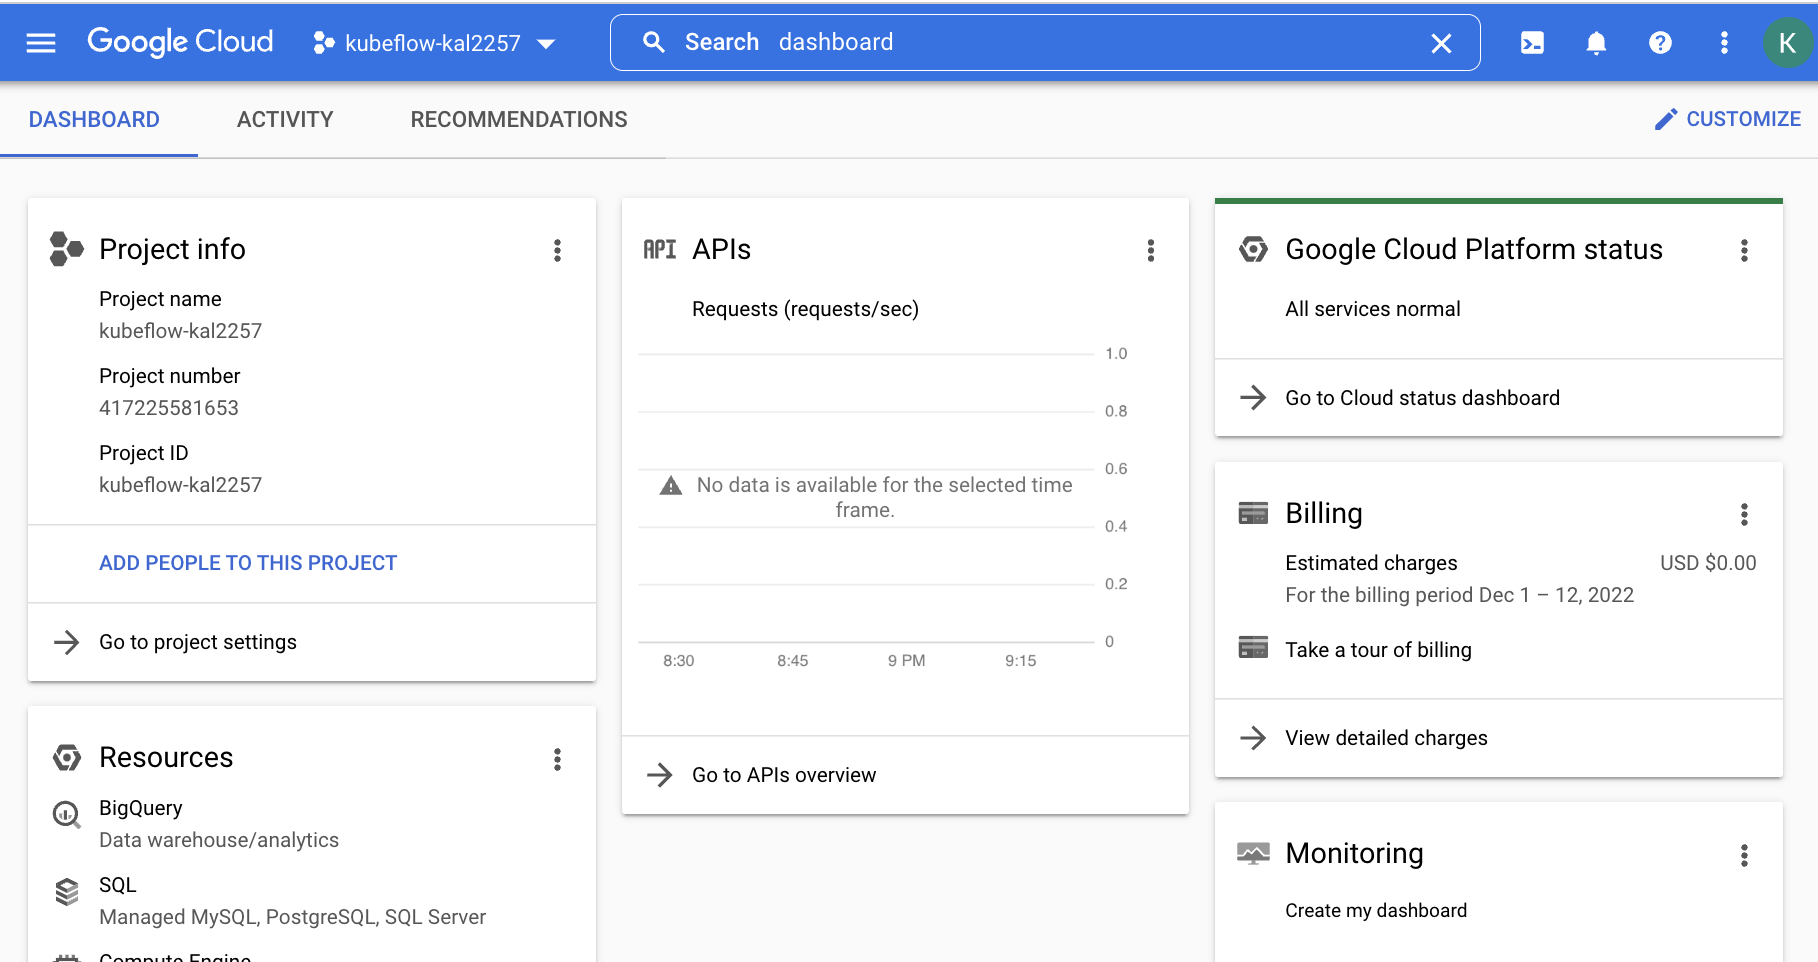

### (b) Install MiniKF and deploy your MinKF instance. (3)


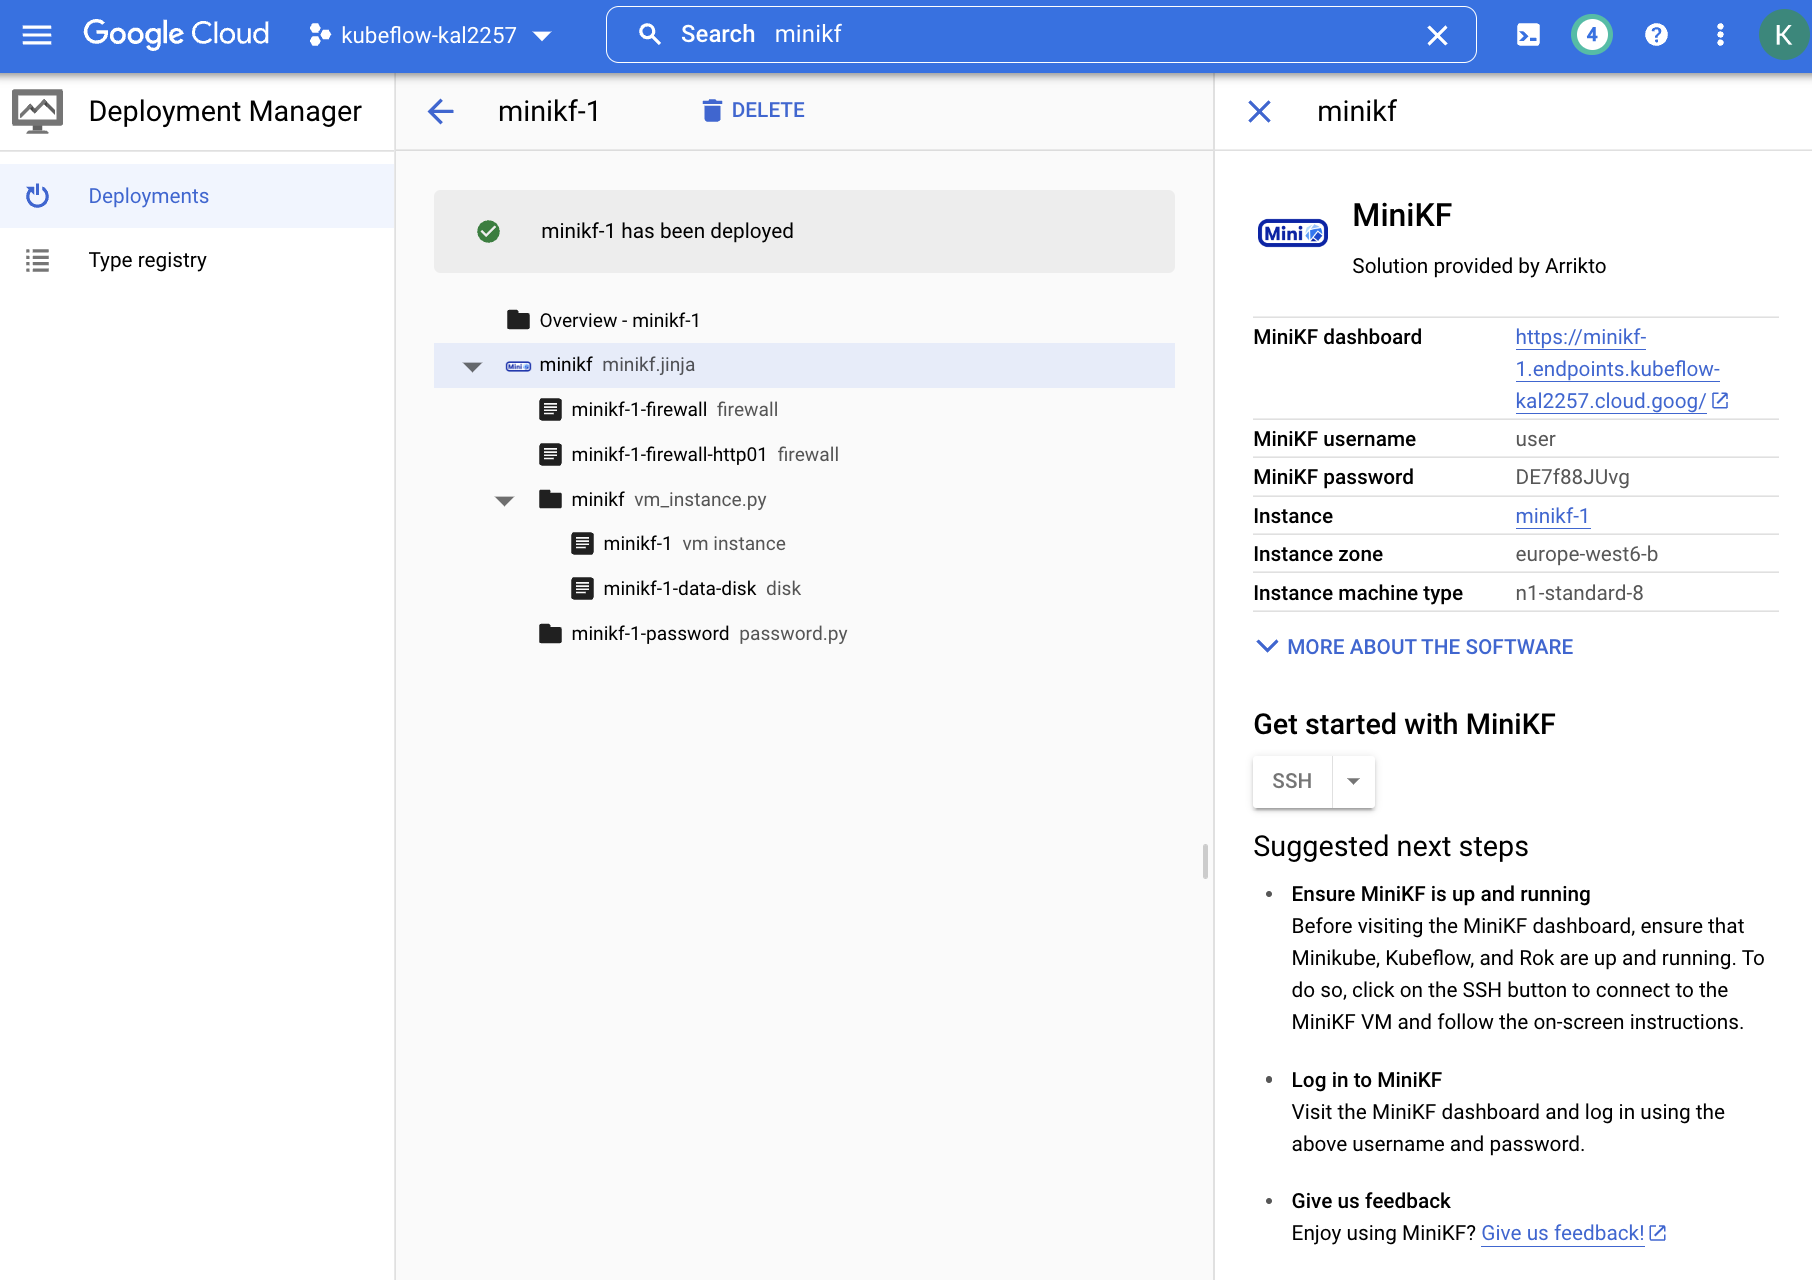

### (c) Login to MiniKF, Kubeflow, and Rok. (3)

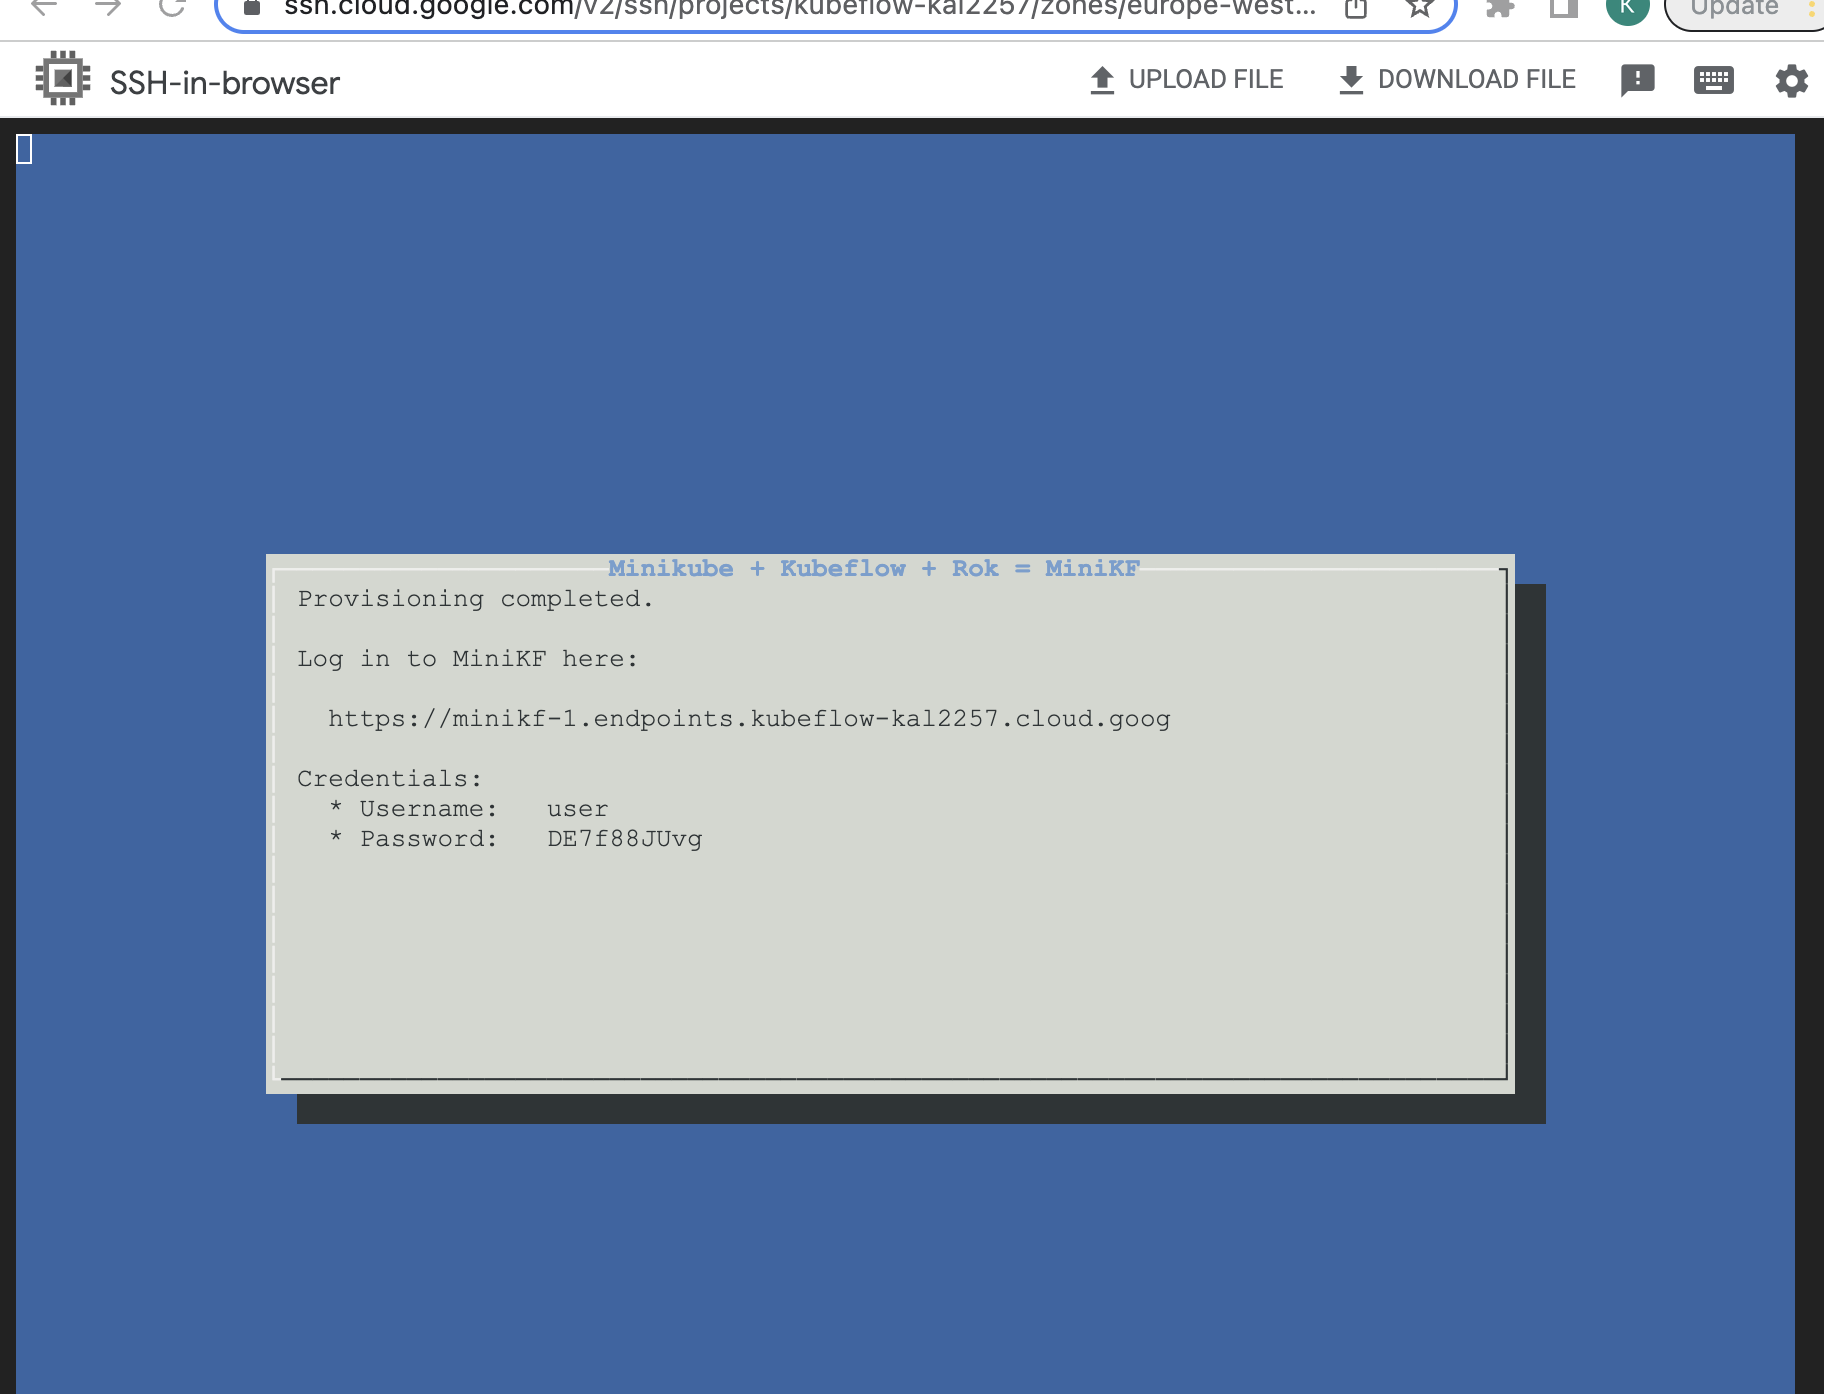

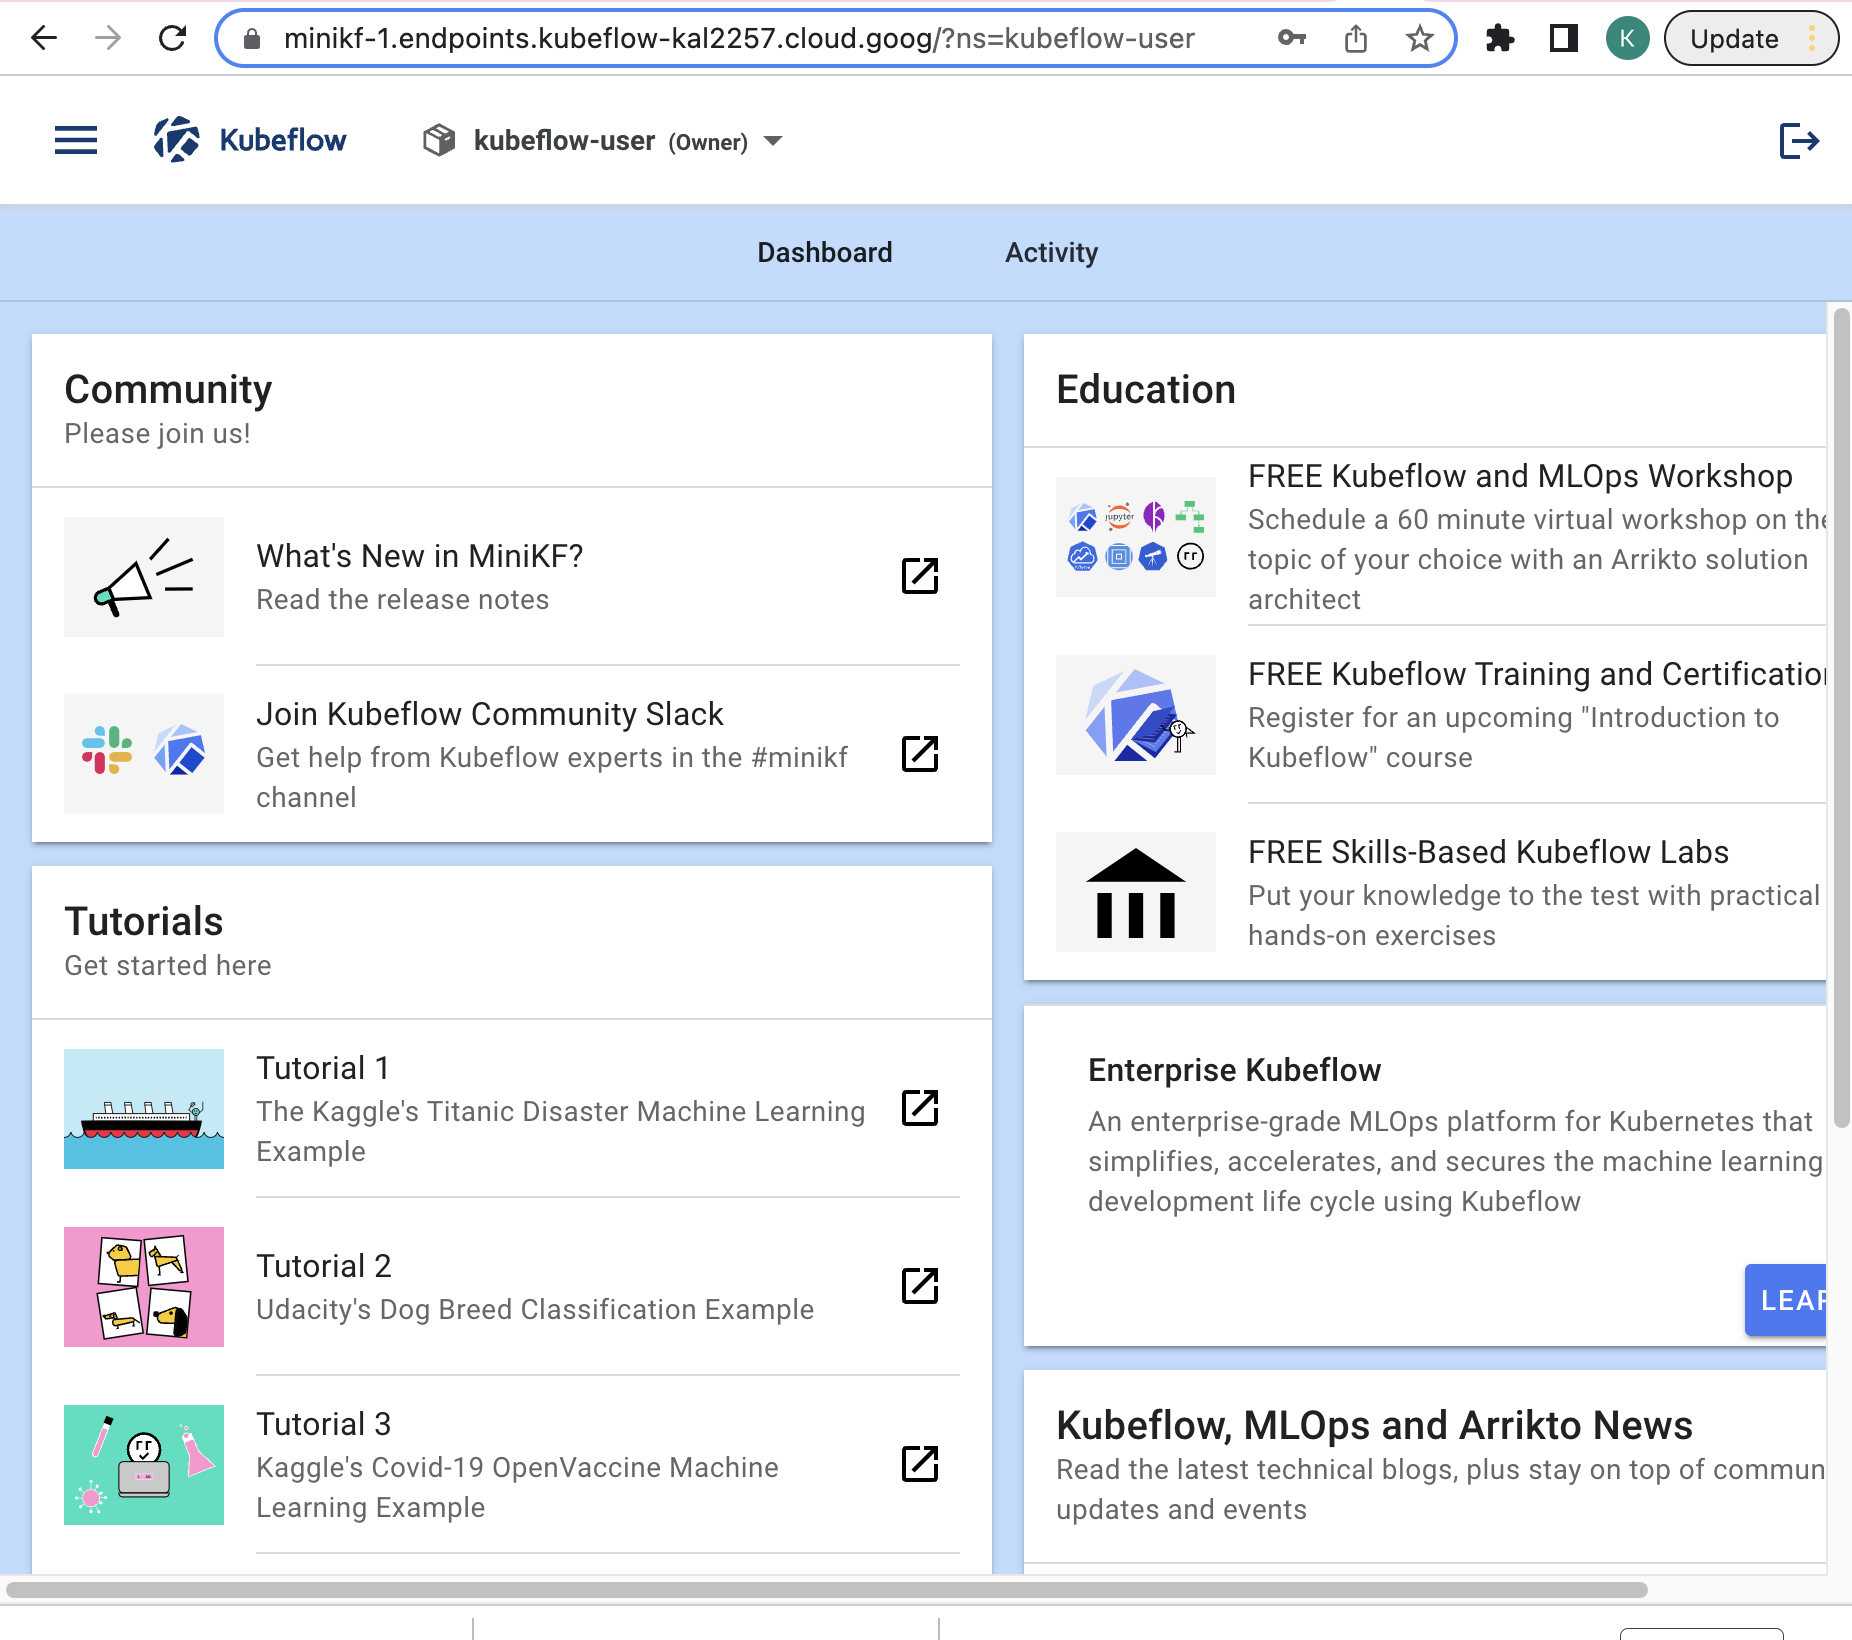

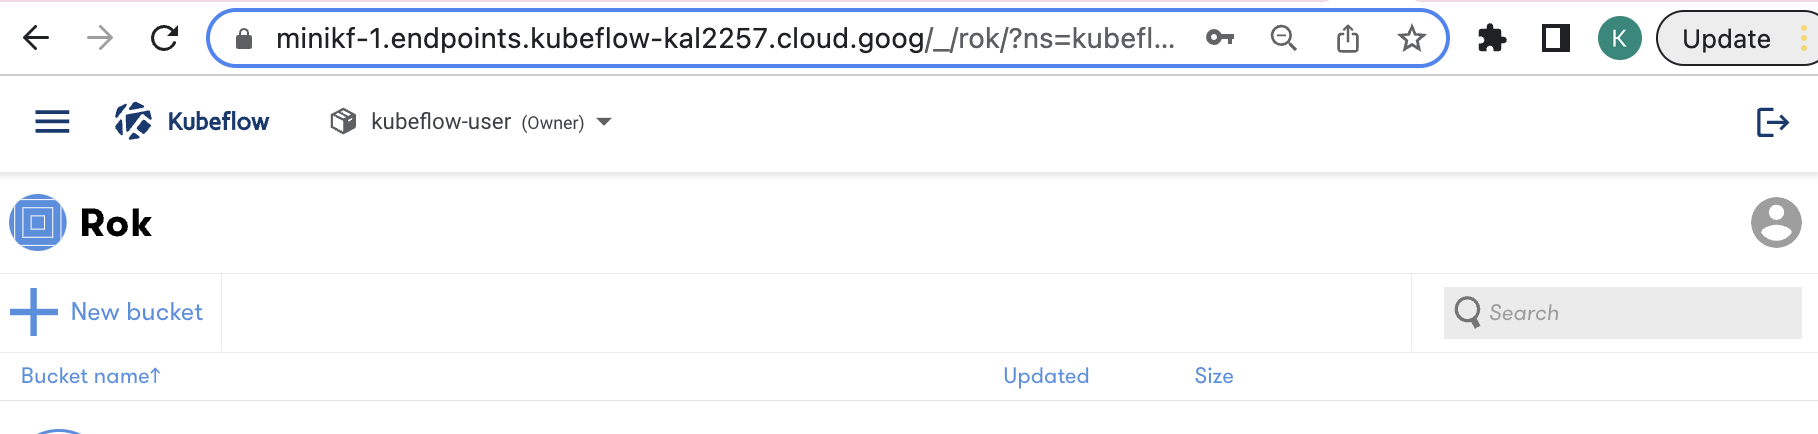

## 2. Run a Pipeline from inside your Notebook: Follow the steps in the codelab to:
### (a) Create a notebook server. (3)

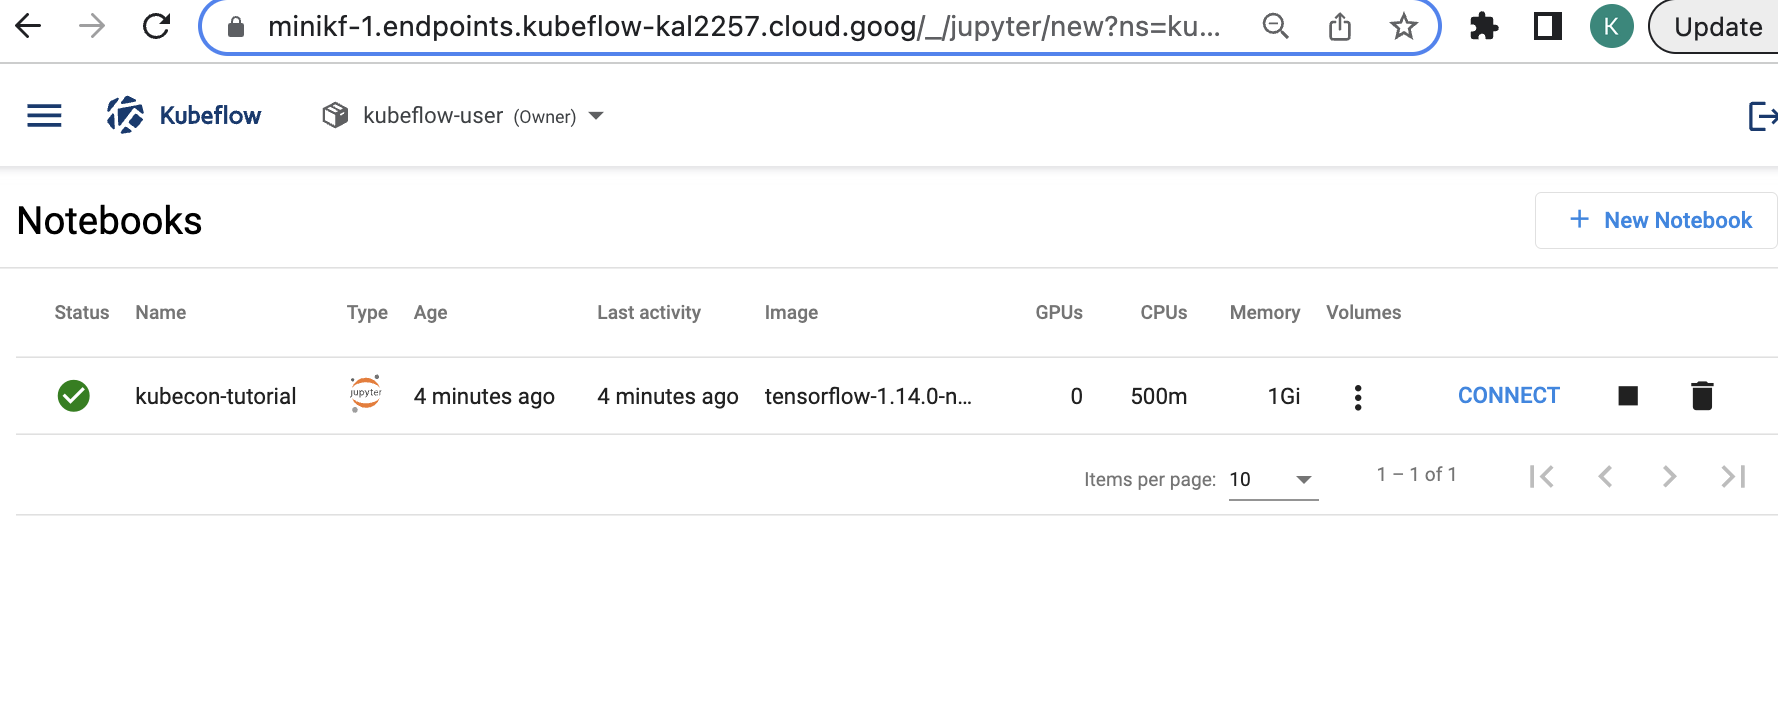

### (b) Download and run the notebook: We will be using pytorch-classification notbeook from the ex- ample repo. Note that the codelab uses a different example from the repo (titanic dataset ml.ipynb). (4)

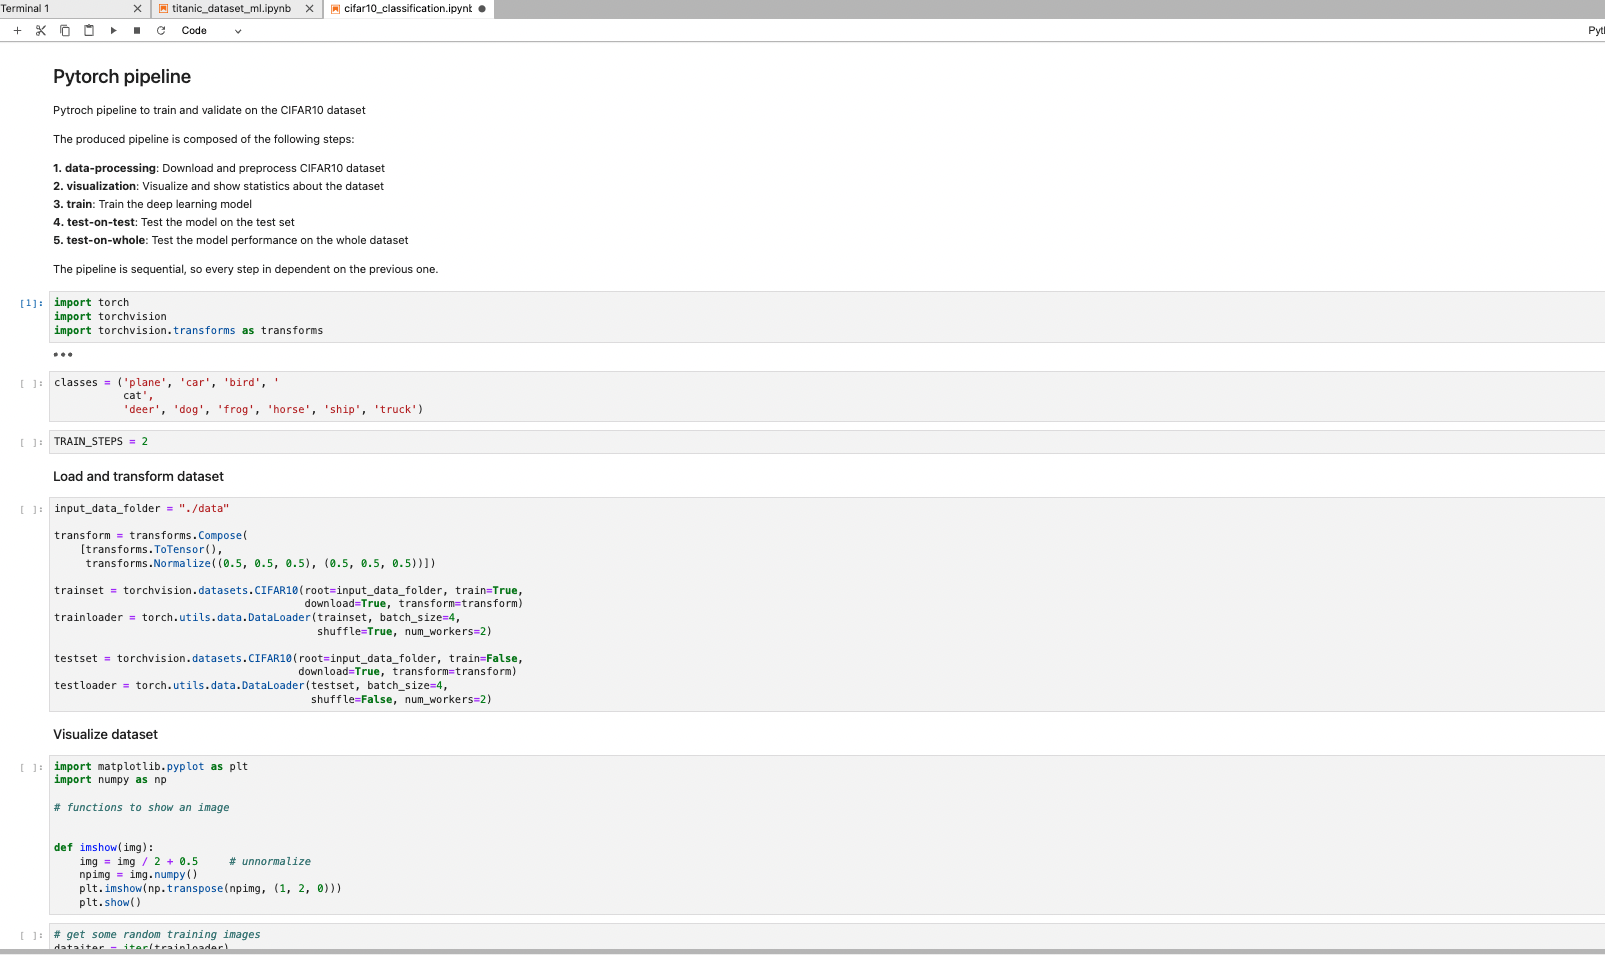

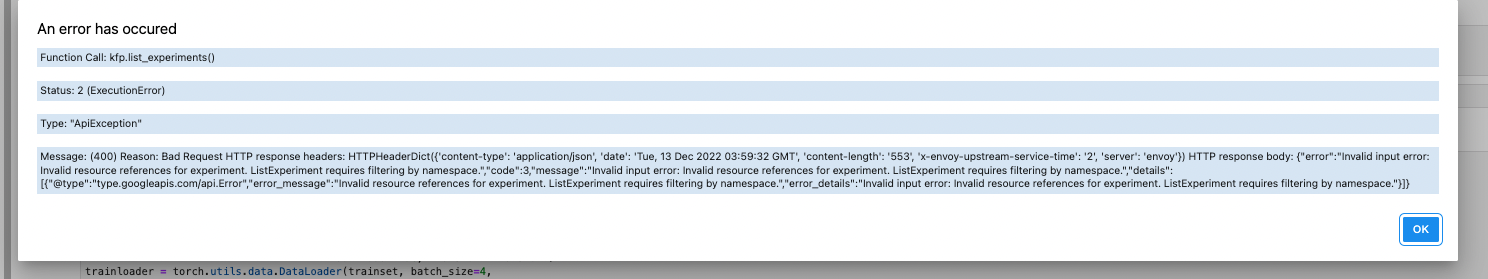

# Problem 4 - Deep Reinforcement Learning 20 points
This question is based on Deep RL concepts discussed in Lecture 8. You need to refer to the papers by Mnih
et al., Nair et al., and Horgan et al. to answer this question. All papers are linked below.


## 1. Explain the difference between episodic and continuous tasks? Given an example of each. (2)

Episodic tasks have a beginning and an end whereas continuous tasks do not have an end. In episodic tasks the reward is given at the end of the episode, and in continuous tasks rewards are received periodically during the task. One example of an episodic task could be playing a round of space invaders, where there is a finite end to the game. Continuous tasks, on the other hand, may distribute rewards depending on factors like recency, and could be something like escaping a maze that is really just a loop that returns to the start and has no exit. This game could go on forever, so it will keep trying to learn how to get out.



## 2. What do the terms exploration and exploitation mean in RL ? Why do the actors employ ε-greedy policy for selecting actions at each step? Should εremain fixed or follow a schedule during Deep RL training? How does the value of εhelp balance exploration and exploitation during training. (1+1+1+1)

In reinforcement learning, exploitation refers to the policy where current learned knowledge is used to determine actions. Exploration is when the agent decides to explore different behaviors and strategies in hopes of improving its reward. If the actors do not employ an epsilon greedy policy for selecting actions, very little exploration will occur and a sub optimal action will be chosen quickly. Using this strategy allows for greater exploration and a chance to escape global minima. Epsilon should follow a schedule during training, otherwise it will continue to explore even after it has found the optimal solution. By decaying the algorithm’s exploration over time, once optimal solutions are found exploration will decrease and the agent will select the correct answer most of the time. The value of epsilon balances exploration and exploitation, in the beginning by starting epsilon off high at one, all moves can be considered, then by the end epsilon should be around 0.1 according to Nair, et all. So there is still some exploration happening, but a small fixed amount because the agent is pretty sure of the optimal strategy at this point.



## 3. How is the Deep Q-Learning algorithm different from Q-learning ? You will follow the steps of Deep Q-Learning algorithm in Mnih et al. (2013) page 5, and explain each step in your own words. (3)

Deep Q networks use neural networks to approximate Q-tables, which are calculated using a Q function to determine rewards, instead of calculating the exact values. They can handle a large number of continuous states rather than just a small number of discrete ones. In order to explore the state fully, the Q table would take too much space and there would be too many state/action pairs. By approximating the Q value with a network, the best reward can be found without the need for this.

Steps:
-Initialize replay memory which stores past experiences of the agent at a given time step.
-Initialize an action function, Q, which will receive rewards and updates the current state to remember the actions benefit.
- For every time step and every episode select a random action with some probability epsilon otherwise select the action with the largest reward based on Q
-Determine reward from action taken, update the state space model, store this experience in replay memory, 
-Take a random sample of transitions from the replay memory and update the agent by training a network on this data and setting the loss function based on the selected action.



## 4. What is the benefit of having a target Q-network ? (3)

An agent's policy is determined by the Q-network, and the target Q-network generates target Q values to be used in the algorithm's loss function as well as the replay memory used for sampling for training the Q-network. The Q-network feeds the best value to the environment, it is then stored in the replay memory. A sample is sent to the Q-network, and the target Q-network receives a copy of the Q-network every N updates.  An action’s reward in the current state is updated by the agent using the rewards of completing these actions in a successive state. This means that both sides of the equation are changing at the same time and leads to instability. Thus there is a target Q-network that remains fixed which will serve as a stable target for some time and loss metrics won’t vary sporadically.




## 5. How does experience replay help in efficient Q-learning ? (3)

Experience replay allows for greater randomization of data and better decorrelates it by averaging the experience of the agent over many time periods when updating its policy. For every time iteration, experiences are stored for the agent. During learning, updates are applied to random samples of experiences from a large number of stored samples. This helps to combat overfitting and allows the agent to better leverage past experiences in future selection of actions and escape global minimum and maximum to achieve better convergence. This is especially crucial when dealing with nonstationary distributions; sampling past transitions helps to smooth the training distribution over many past actions.



## 6. What is prioritized experience replay ? (2)

Prioritized experience replay is a method of biased sampling where the focus is on the more “surprising” experiences, with the assumption that these will contain more important information in terms of improving our reward. Due to sparse reward signals and a data distribution that depends on the policy of a given agent, bias sampling is ideal for this scenario. Prioritization was even found to be the single greatest factor in an agent's success in one study.



## 7. Compare and contrast GORILA (General Reinforcement Learning Architecture) and Ape-X architec-ture. Provide three similarities and three differences. (3)

Ape-X uses prioritized experience replay in a distributed manner for deep reinforcement learning. Many actors generate experiences and add these shared experiences to the replay memory. Here initial priorities are calculated and a single learner will draw samples and update the network and experience priorities in memory. Updates are regularly sent with the most recent parameters from the learner to the actors. GORILA and Ape-X both have 2 parts that run at the same time in the absence of any high level synchronization, acting and learning. Both make use of distributed training and the Q network is replicated over many workers. However, where GORILA simply uses experience replay, Ape-x uses prioritized experience replay where only the most surprising experiences are focused on. Also, a shared centralized replay memory is present in Ape-x but not in GORILA, which relies on uniform sampling. In Ape-x, the most important data is sampled more frequently. If at any point an actor finds high priority, important data, all the other replicas will also gain from this important information. Likewise, Ape-x has the flexibility to give different actors different policies to explore, this is not true for GORILA. This allows Ape-x to encounter a larger variety of experiences.
